##  Dimensionality Reduction (Truncated SVD and PCA) 

The iris dataset is a 150x4 2D array. Each row  **represents** an iris with 4 numbers. It is a **4-dimensional representation of the data**.  

Another less grandiose way of putting this is that an iris is represented by 4 of its numerical **features**.  
In this notebook,
we've explored training a classifier on different subsets of those  4 features, and also on
all 4 features.  

But why limit ourselves to representations constructed out of subsets of the original 4 features?
In the assignment, you are asked to test classifiers trained on **different** representations of the data,
for example, on a sepal area feature computed by multiplying the sepal length of each iris
by its sepal width.  There is also a petal area representation computed by multiplying the petal length of each iris  by its petal width.  And of course, there is a representation consisting of both sepal
area and sepal width, ostensibly a 2D representation (the classifier is trained a 150x2 array),
but really constructed from information extracted from all 4 dimensions of the original data
(we have been referring to Questions 4a and 4b of the assignment).  This sort of transformation of the data, using the original 4 dimensions to compute a 2-dimensional alternative representation, is called **dimensionality reduction**.  The exercise in the homework -- computing 2 area features -- is an intuitively appealing way of representing the data.  It makes sense -- and even better -- it works pretty well.  This is dimensionality reduction by clever idea.

But there is a whole cottage industry devoted to finding **algorithms** for dimensionality reduction.  A dimensionality reduction algorithm is a program which, given a dataset of $n$ dimensions, and a target
number of dimensions $m$ ($m \lt n$), finds the **best** $m$-dimensional representation of that
data under some very precise mathematical definition of what "best" means.  For
example, viewing the data as  150 points in 4-dimensional space, consider each of the pairwise distances
(that's 11,175 distances). We might define the best 2D representation as the one that minimizes the overall change in distances between the points.  Thus, if we're we're successful, a certain
kind of relationship among the data points is preserved as much as possible.
Defining Euclidean distance as what's preserved might be a good
idea, for example, if we're using our 2D representation for
visualization.  Points that are close in the 4D representation remain close in the 
reduced representation, so  we're getting a relatively undistorted view
of the distance relationships between points in the data, relationships
that can't be visualized in the original data.  Optimal distance preservation
is the objective of a dimensionality reduction algorithm called
**Multi-Dimensional Scaling** (MDS).

But the uses of dimensionality reduction go far beyond creating
informative visualizations. The general problem of data analysis is discovering
meaningful relationships in your data.  This is made more difficult when there
are many dimensions (many variables).  Thus, automatic ways of discovering redundancies
among the variables, allowing for two or more variables to be compressed into
one, or five variables to be compressed into three, are useful both
cognitively and computationally. Reduction of variables may make generalizations
easier to see or it may bring some computational analysis that was unfeasible
suddenly within reach (for example K-Nearest Neighbor Regression,
which we used as our example of a nonlinear regressor, may
become computationally infeasible with high-dimensionality data,
so doing KNN on data that has had its dimensionality reduced in some
way is common).
Generally reducing dimensions will lose information.
Thus, the general goal of dimensionality reduction is to reduce as much as possible while 
achieving the best possible approximation of the original data.  The different way
of defining and implementing these goals distinguish various
approaches to dimensionality reduction.  We'll go through this
more slowly below.


One of the most famous  dimensionality reductions technique is **Principle Components Analysis** (PCA).
This is closely related to Truncated SVD (as it's called in scikit learn), which we'll explain first,
because it's simpler. The SVD in Truncated SVD refers to a  key concept in Linear Algebra,
the **singular value decomposition (SVD) of a matrix**.  The SVD of a matrix $A$
decomposes it into an exact product of three matrices computed by finding the Eigenvectors and Eigenvalues
of $A^{T}A$.  The "truncation" in Truncated SVD 
refers to how the dimensionality reduction is achieved: Use only the
top $m$ components (corresponding to the top $m$ leading eigenvalues) of the decomposition.
So we start with an **exact decomposition** (the SVD) and then make it approximate
by leaving out all but the $m$ most important factors (more precisely, zeroing out the others)  Truncated SVD applied to term-document matrices is called Latent Semantic Analysis or Latent Semantic Indexing (LSA or LSI).  PCA does essentially the same thing as truncated SVD but starts with centered data; if $C$ is the centered version of $A$, then  $C^{T}C$ is the covariance matrix of $A$, so the eigenvectors found are the eigenvectors of the covariance matrix; a consequence of this is that the top $m$ leading eigenvectors are the $m$ vectors that do the best job of accounting for the variance in the data.

It's a rather amazing fact about the truncated SVD that it gives the 
best $m$-dimensional approximation of the original  data, 
as measured by something called the Frobenius Norm.  The rigorous idea that
you would explore in a Linear Algebra course is that truncated SVD gives
the best **rank** $m$ approximation.

The scikit learn toolset provides implementations of a number of dimensionality reduction tools
or tools that can be used to generate reduced output, including
Principle Components Analysis (PCA, see `sklearn.decomposition.PCA` illustrated below ),
Truncated SVD (see `sklearn.decomposition.TruncatedSVD` also illustrated below), 
Kernel PCA (`sklearn.decomposition.KernelPCA`, illustrated below for the RBF Kernel), 
Multidimensional Scaling (MDS, see `sklearn.manifold.MDS`),
Non Negative Matrix Factorization (NMF, see `sklearn.decomposition.NMF`),
Factor Analysis (see `sklearn.decomposition.FactorAnalysis`),
and Linear Discriminant Analysis (LDA, see `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`), 
well as [numerous others.](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

The interested reader should consult [Sumithra and Surendran (2015)](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=ed2fc78cf5d7eb8233deaa9dde8f42b1e2d7f661),
which is a survey of dimensionality reduction techniques,
discussing TruncatedSVD, PCA and
and at least 10 others.   Additionally, there is Uniform Manifold Approximation
and Projection (UMAP), for which [a Python implementation](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) exists which has been applied to topic
modelling in [BERT.](https://www.pinecone.io/learn/bertopic/)
And of course, this list is incomplete.  As we said at the outset,
dimensionality reduction is an **industry**.

Our goal here is simply to introduce the
idea of this kind of data analysis and to give some general motivations.  We
will illustrate by applying PCA to the iris data set, visualizing the result,
and apply it to the iris classification task.

Reloading

In [395]:
import numpy as np
import sklearn
import sklearn.decomposition as dec
#import sklearn.manifold as man
from sklearn import linear_model
from sklearn.metrics import accuracy_score, recall_score, precision_score
import sklearn.datasets 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances#cosine_similarity

iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)

(150, 4)


Now let's reduce the data to 2 dimensions using `PCA`; we'll also use `TruncatedSVD` for comparison.

In [396]:
X = iris.data
reducer = dec.PCA(n_components=2)
reducer_svd = dec.TruncatedSVD(n_components=2)
#reducer_mds = man.MDS(n_components=2,normalized_stress="auto")

X_reduced = reducer.fit_transform(X)
X_reduced_svd = reducer_svd.fit_transform(X)
#X_reduced_mds = reducer_mds.fit_transform(X)

Now we said above that one criterion for a good dimensionality
reduction is that it represents the data `X`  as `X_reduced`, where
`X_reduced` has fewer dimensions,
while approximating it as well as possible.
Let's try to measure how good an approximation
of `X` `X_reduced` gives. We can't directly
compare `X` and `X_reduced` because they have different dimensionality,
so we **untransform** `X_reduced` and use 
Frobenius Norm (`scipy.linalg.norm(X-X',ord="for")`
to quantify the difference between `X` and its untransformed
version. In this context, Frobenius Norm becomes a 
measure of (the square root of summed) squared errors.

The details of this will make more sense after we develop some other ideas.

In [397]:
import scipy

def information_lost(X, X_reduced, transformer):
    """
    Meaasure the amount of information lost by the transformer.
    
    Reverse the transformation and look at the difference matrix gotten
    by subtracting X_reduced reverse-transformed from X. In the ideal
    case of no information lost this difference should be 0.
    
    Compare the frobenius norm  (a kind of length
    measure for matrices) of the difference matrix to the frobenius norm of X.
    """
    return scipy.linalg.norm(X - transformer.inverse_transform(X_reduced),ord="fro")

def percent_information_loss(X, X_reduced, reansformer):
    return information_lost(X, X_reduced, transformer)/scipy.linalg.norm(X,ord="fro")

Here's our measure of information loss for PCA

In [398]:
information_lost(X, X_reduced, reducer)

3.899313318962578

And here it is for truncated SVD:

In [399]:
information_lost(X, X_reduced_svd, reducer_svd)

3.940889887879374

#### Understanding the Components in Principle Components Analysis

Now, before can understand how our PCA representations  approximate the original data,
we have to understand what the  **Components** in Principle Components Analysis (or SVD
reduction) are, and why they are **Principle**. Simply put, they are the $m$ (for us $m=2$)  4D **axes** (or vectors) that most naturally represent the data. 

Here are the components of our reduction:

In [222]:
axes = reducer_svd.components_
axes

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081]])

The two rows are the 4D components.  We have named them `axes`, because that's how they're
going to be used.  They are in fact the two leading eigenvectors of $X^TX$.

Here are all four:

In [225]:
import scipy

# eig_values = scipy.linalg.eig(X.T@X)[0] 
eigs = scipy.linalg.eig(X.T@X)[1].T
eigs

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

To find the 2D truncated_svd representation of iris $i$, which is row $i$ of our data $X$, we find the coordinates of row $i$ with respect to the first two eigenvectors.  For example, for the coordinate with respect to `axes[0]`, let $u$ be
`axes[0]`, which is a unit vector, and let $\theta$ be the angle between $X_{i}$ and $u$. 

Schematically:

[]

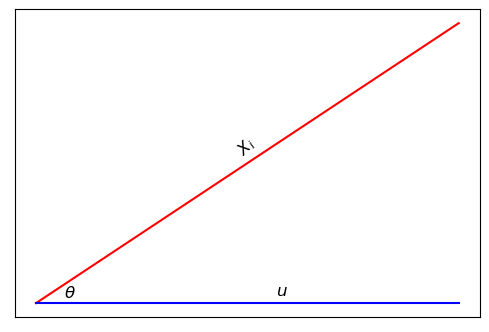

In [327]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
newX = np.arange(0,3,.01)
slope = 3
newY = (slope*newX)
Data = np.concatenate([newX[:,np.newaxis],newY[:,np.newaxis]],axis=1)
ax.plot(newX,newY,c="r")
ax.plot([0,newX[-1]],[0,0],c="b")
ax.annotate(r"$\theta$",(0,0),textcoords="offset points",xytext=(20,4),fontsize=12)
ax.annotate(r"$u$",(1.5,0),textcoords="offset points",xytext=(20,6),fontsize=12)
ax.annotate(r"$X_{i}$",(1.2,4.5),textcoords="offset points",xytext=(20,6),fontsize=12,rotation=45)
# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

Then:

$$
\begin{array}[t]{ll}
(1) & \text{Coord}_{u}(X_i) = \, \mid\! X_{i} \!\mid \cos{\theta} =\,
          \mid\! X_{i} \!\mid  \frac{X_{i}\cdot u}{ \,\mid X_{i} \mid \cdot \mid u \mid\,} =\,
         \mid\! X_{i} \!\mid  \frac{X_{i}\cdot u}{\, \mid X_{i} \mid \cdot \,1} = X_{i}\cdot u
\end{array}
$$  


Here we've used a standard formula for the cosine of the angle between
two vectors, which, happily, does not require knowing the angle.
And the result is that the coordinate of a point $X_i$ with respect to an axis, is just
the dot product of the $X_{i}$ vector with the unit vector in the direction
of the axis.

Let's drill one level deeper to see what a component (or new axis) really is.  The dot product of two vectors is the sum of the products of their corresponding
values.  Here's what dot product
actually amounts to for our data, with $u$ the first column of `axes` and
`Xi` row $i$ of the data:

$$
\begin{array}[t]{lcl}
\text{Coord}_{u}(X_{i}) &=& X_{i}\cdot u\\
                        &=& X_{i}[0]\cdot u[0] +
                            X_{i}[1]\cdot u[1] +
                            X_{i}[2]\cdot u[2] +
                            X_{i}[3]\cdot u[3]
\end{array}
$$

That is, the first coordinate for the transformed version of $X_{i}$ is actually a linear combination of the 
original coordinates of $X_{i}$, with the coefficients given by $u$, the first or **principle**
component.  The second coordinate will be the dot product of $X_{i}$ with the
second component  (`axes[1]`). 

Conveniently, Equation (1) means that the way to transform an entire data set `X` into the new
coordinate system is just
the matrix product of  the axes (`axes`, shape 2x4) with our transposed data `X.T`.  Writing $U$  for the
matrix that contains the unit vectors for the axes, that matrix product is usually written this way:

$$
U\,X^{T}
$$

For our example, $U$ = `axes` and the 1D array containing the $X_{i}$ coordinates with respect to both
axes is just the matrix product of `axes` with $X_i$.

The code to demonstrate this (matrix product in `numpy` is `@`):

In [360]:
from scipy.linalg import norm
i = 2
Xi = X[i,:]
print(Xi)
# Computing the coords two equivalent ways
print(np.array((Xi.dot(axes[0,:]), Xi.dot(axes[1,:]))))
axes@Xi

[4.7 3.2 1.3 0.2]
[5.44697714 2.09520636]


array([5.44697714, 2.09520636])

What we've just done is more conveniently implemented in Scikit Learn as the `.transform()` method.

This method requires a 2D data array, so to apply it to the 1D array `Xi`, we convert it to a 
2D array (a data matrix with one row):

In [229]:
print(reducer_svd.transform(Xi[np.newaxis,:]))

[[5.44697714 2.09520636]]


Call the reduced iris representation (the 2D representation of 4D data) `Xi_reduced`:

```python
Xi_reduced = axes@Xi
```

To  compute an estimate of `Xi` from `Xi_reduced`, we need to **untransform** `Xi`,
take it back to 4 dimensions.  To do that, we just add the 4D component vectors,
weighted by the coordinates of `Xi_reduced`.

```python
(1) Xi_unreduced = Xi_reduced[0]* axes[0] + Xi_reduced[1]* axes[1]
```

And algebraically the right-hand side is the same as 
`axes.T@Xi_reduced` (column-space view of matrix multiplication).

In [361]:
Xi = X[i,:]                #  The original Xi
Xi_reduced = axes@Xi       # The 2D representation of Xi

print(f"                                                 {Xi=}")    
print(f"                                         {Xi_reduced=}")             
        

# Two equivalent ways of unreducing reduced_Xi
print()
print(f"{Xi_reduced[0]* axes[:,0] + Xi_reduced[1]* axes[:,1]=}")
print(f"                                    {axes.T@Xi_reduced=}") 

                                                 Xi=array([4.7, 3.2, 1.3, 0.2])
                                         Xi_reduced=array([5.44697714, 2.09520636])

Xi_reduced[0]* axes[:,0] + Xi_reduced[1]* axes[:,1]=array([4.88762795, 2.69343675])
                                    axes.T@Xi_reduced=array([4.68667405, 3.21586325, 1.30954904, 0.19452725])


Let's call our estimate of `Xi`

```
array([4.68667405, 3.21586325, 1.30954904, 0.19452725])
```

`Xi_unreduced`.  

We'll now look at how good an estimate we have:

In [400]:
Xi_unreduced = axes.T@Xi_reduced
print(Xi - Xi_unreduced)  # All differences are small

[ 0.01332595 -0.01586325 -0.00954904  0.00547275]


And what's called the Frobenius Norm gives us a  sum-of-squared-errors-like numerical measure
of what's lost:

In [236]:
print(np.linalg.norm((Xi - Xi_unreduced)[np.newaxis,:],ord="fro")) 

[ 0.01332595 -0.01586325 -0.00954904  0.00547275]
0.02345972751109684


So `Xi_unreduced` is just `Xi` with a little information loss.  There wouldn't be any
information loss if we weren't truncating the sum in the SVD representation (recall that
`axes` has  only 2 of the 4 eigenvectors).

What we did above with `axes.T@Xi_reduced` to unreduce the 2D SVD representation
is more conveniently implemented in Scikit Learn
as the inverse transform method, which, like the `.transform()` method, requires
a 2D array as its argument:

In [372]:
print(reducer_svd.inverse_transform(X_reduced_svd[i:i+1,:]))

[[4.68667405 3.21586325 1.30954904 0.19452725]]


To get the feel of what information loss means, let's try using all 4 eigenvectors 
on irix `Xi`.  We won't be "reducing" dimensionality, but we will be representing
iris `Xi` with respect to different axes:

In [402]:
print(Xi) 
# A 4D rep of Xi using all 4 eigenvectors as the axes.
new_Xi = eigs@Xi
print(new_Xi)
print(eigs.T@new_Xi)  # new_Xi untransformed 

[4.7 3.2 1.3 0.2]
[5.44697714 2.09520636 0.01502926 0.01801333]
[4.7 3.2 1.3 0.2]


Zero information loss.  Of course the code we just used on 4 eigenvectors could
also have been done with any 4 orthogonal unit vectors,
and also with zero information loss.

To demonstrate, we create four random orthogonal unit vectors.

In [403]:
def gram_schmidt_columns(X):
    Q, R = np.linalg.qr(X)
    return Q.T

def random_orthogonal_unit_vectors(n=4):
    n_randos = np.random.randn(n**2).reshape((n,n))
    return gram_schmidt_columns(n_randos)

normed_ortho_randos = random_orthogonal_unit_vectors()

# The columns are unit vectors 
print(np.linalg.norm(normed_ortho_randos,axis=1))
# The rows are also orthogonal to one another (dot product is 0 or close to it computationally)
normed_ortho_randos[0].dot(normed_ortho_randos[3])


[1. 1. 1. 1.]


-5.551115123125783e-17

Representing `Xi` using these random axes, then untransforming with zero information loss

In [404]:
print(Xi)

new_Xi = normed_ortho_randos@Xi
print(new_Xi)

XiU = normed_ortho_randos.T@new_Xi
print(XiU)

[4.7 3.2 1.3 0.2]
[-0.31683899 -3.13957229 -2.07797154 -4.44800328]
[4.7 3.2 1.3 0.2]


The magic of SVD eigenvectors is thus not that these 4 vectors can represent the data,
but that just 2 of them can do so with very little information loss.

Compare using the first 2 of our `normed_ortho_randos` and computing the information loss
by reducing and unreducing:

In [405]:
X_reduced_rando = normed_ortho_randos[:2,:]@X.T
print(X_reduced_rando.shape)
#The inverse of normed_ortho_randos is normed_ortho_randos.T
X_rando = normed_ortho_randos[:2,:].T@X_reduced_rando
print(f"Info loss with random orthogonal unit vectors: {np.linalg.norm(X-X_rando.T,ord='fro'):.2f}")
print(f"Info loss with Truncated SVD unit vectors:     {information_lost(X, X_reduced_svd, reducer_svd): 5.2f}")

(2, 150)
Info loss with random orthogonal unit vectors: 85.86
Info loss with Truncated SVD unit vectors:      3.94


Linear Algebra teaches us that the Truncated SVD reduction 
gives the best rank 2 estimate of the original data,
and we have just seen an example of what that means by
seeing that the Truncated SVD axes yield a better estimate than 
two randomly chosen axes.

Summing up, we reduce dimensionality, losing information; that means the reduced data yields only 
an estimate of the original data. But with Truncated SVD we reduce in such a way that we have the best
estimate.

The high-level description of how Truncated SVD does this is that it uses
the $m$ leading eigenvectors of $X^TX$. We're not going
to attempt here to explain how this works or indeed what eigenvectors
are. The key takeaway is that they provide  *magic* axes:

1. `Xi_reduced`, the reduced representation of any data item
   `Xi` is just its coordinates with respect to the components.
2.  For truncated_SVD reduction to $m$ dimensions, the reduction's estimate of item `Xi` is gotten 
    by unreducing `Xi_reduced`: by computing the sum of the $m$ components 
    weighted by the coordinates of `Xi`; moreover that estimate is the best possible
    rank $m$ estimate of `Xi`.

#### PCA and Explaining Variance

Up until now we've spoken about only one criterion a dimensionality reduction might meet,
getting the best estimate of the original data we can in a given number of dimensions.

But we'll get a much better feel for why a dimensionality reduction model
can be useful by turning to another criterion, explaining the greatest percentage of the variance
in a given number of dimensions.  To do that we discuss
a slight variant of truncated SVD reduction, Principle Component Analysis (PCA).  A PCA model 
does the best job of explaining the variance in a given
number of dimensions.  The regression notebook features an extended discussion
of what explaining variance means, defines percentage of variance explained
precisely and relates it to $R^2$, an important measure of the quality of a regression
model. A point made there is that percentage of variance explained is not
exactly the same as $R^2$, because the latter can be negative. For our
purposes here, we're going to equate them.  This will do no
harm because negative $R^2$ values don't arise in PCA and truncated SVD reductions.


Let's look at the explained variance of the truncated SVD model.  It is computed
axis by axis.  

In [376]:
reducer_svd.explained_variance_

array([2.40184778, 2.03709712])

Versus PCA:

In [377]:
reducer.explained_variance_

array([4.22824171, 0.24267075])

Notice that for both models, the first axis has the greatest
amount of explained variance, but the PCA model packs much more of its explanatory power into that 
first axis. 

The percentage of explained variance is stored in the `reducer.explained_variance_ratio_` attribute:

In [378]:
print(reducer_svd.explained_variance_ratio_)
print(reducer.explained_variance_ratio_)

[0.52875361 0.44845576]
[0.92461872 0.05306648]


More than 92% of the variance explanation is packed into that first axis
for PCA.

And the percentage of variance explained is the variance explained divided by
the total variance.  We demonstrate this  for the PCA model, which uses centered data:

In [379]:
def pca_variance(X):
    centered = (X-X.mean(axis=0))
    # Total variance is the sum of the variances of the four centered columns, using N-1 to compute variance
    return centered.var(ddof=1,axis=0).sum()

total_variance = pca_variance(X)
total_variance

4.572957046979868

In [380]:
print(reducer.explained_variance_ratio_)
print(reducer.explained_variance_/total_variance)

[0.92461872 0.05306648]
[0.92461872 0.05306648]


So the total percentage of variance explained for our 2D PCA  model is:

In [406]:
reducer.explained_variance_ratio_.sum()

0.977685206318795

To relate this to the `R2_score` metric we discussed in the regression notebook, do:

In [263]:
from sklearn.metrics import r2_score
X_unreduced = reducer.inverse_transform(X_reduced)
# Need to specify how R2 scores of the columns will be combined
r2_score(X,X_unreduced,multioutput="variance_weighted")

0.9776852063187949

Comparing percentage of explained variance for PCA and
truncated SVD, PCA wins, but not until the fourth number after the decimal point
with this data set.

In [407]:
print(reducer.explained_variance_ratio_.sum())
print(reducer_svd.explained_variance_ratio_.sum())

0.977685206318795
0.9772093692426485


So we've established that PCA does well at explaining variance,
though we haven't said anything about how.

To draw a picture coveying the main idea of PCA. We cook up a straight line `Data` 
and blur it with a bit of noise (consistent with the way the term noise is often used,
this noise, like say, measuring errors, is normally distributed). The noisy line points are collected into a 2D array called `Data2`:

In [381]:
import numpy as np

def line_with_noise (slope=3,intercept=4,bd=.8,step=.01,std=1):
    """
    The noise is normally distributed. 
    
    For more predictable results, ratio of `bd` to `step` shd be an integer, so
    not for example `bd=.8`, `step=.013`.
    """
    newX = np.arange(0,bd,step)
    newY = (slope*newX + intercept)
    Data = np.concatenate([newX[:,np.newaxis],newY[:,np.newaxis]],axis=1)

    #randn(N) gives N normally distributed "random" pts with mean 0 and var 1
    #randos shd have same shape as newY
    N = int(bd/step)
    randos = np.random.randn(N)
    #print(N, newY.shape)
    newY2 = newY + std * randos
    Data2 = np.concatenate([newX[:,np.newaxis],newY2[:,np.newaxis]],axis=1)
    return Data, Data2

slope,bd = 3,.8
Data, Data2 = line_with_noise (slope=3,intercept=1,bd=bd,std=.2)

We now do a PCA dimensionality reduction to find the **one** component best
capturing the variance of the noisy points in `Data2`:

In [382]:
#reducer_svd = dec.TruncatedSVD(n_components=1)
from sklearn import decomposition as dec

def PCA_reduced(Data,n_components=2):
    reducer= dec.PCA(n_components=n_components)
    return reducer.fit_transform(Data),reducer

(Data_reduced,reducer) = PCA_reduced(Data2, n_components=1)

We draw the noisy points in blue and the single component 
of the PCA reduction in red.  We add the original line
as a dotted green line.  The single PCA component is almost exactly
parallel to the original line:

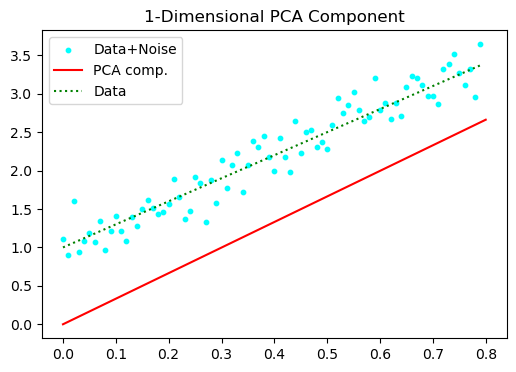

In [383]:
from sklearn import linear_model

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# scaling
#Data,Data2 = 40*Data, 40*Data2
ax.scatter(Data2[:, 0], Data2[:, 1], s=10, c="cyan",label="Data+Noise")
#comp_vec = reducer.components_.T[:,0]
#scaler = -2.8
comp_vec = reducer.components_[0]
# Get the PCA axis and the data xrange to be the same
scaler = bd/comp_vec[0]
comp_vec = scaler * comp_vec

xhat,yhat = comp_vec[0], comp_vec[1]
ax.plot(np.array([0,xhat]),np.array([0,yhat]),c="r",label="PCA comp.")
ax.plot(Data[:,0],Data[:,1],c="green",linestyle="dotted",label="Data")
ax.set_title("1-Dimensional PCA Component")
ax.legend()
#To see what linear regression does, uncomment
#lin1 = linear_model.LinearRegression()
#lin1.fit(Data2[:, 0:1], Data2[:, 1:2])
#t0full, t1full = lin1.intercept_, lin1.coef_[0]
# Plot the regression line (almost completely coincides with the original green line; look at line style)
#X = np.arange(0,8,.1)
#plt.plot(X, t0full + t1full * X, "slategray",linestyle="dashed",alpha=.6,label="Regr")


Demonstrating the near parallelism of PCA component with the original line (with slope 3).

In [384]:
comp_vec = reducer.components_[0]
comp_vec[1]/comp_vec[0]

3.3271279403919283

The PCA axis is not exactly parallel to the original line because the noise has made
the axis only an approximation of the direction of the original line

Computing the variance explained on our own to make a point:

In [385]:
Data2_unreduced = reducer.inverse_transform(Data_reduced)
# Explained variance = TotalVariance - Unexplained (Error) Variance
explained_variance = pca_variance(Data2) - pca_variance(Data2 - Data2_unreduced)
explained_variance 

0.6111550879147107

Verifying:

In [386]:
reducer.explained_variance_

array([0.61115509])

Why does the PCA axis point in the same direction as the original line (`Data`)?

The defining feature of the first axis PCA is that it finds the axis that best explains the variance.
Since

$$
\begin{array}[t]{lcl}
\text{Explained variance} & = & \text{TotalVariance} - \text{Unexplained (Error) Variance}\\
                          & = & \text{Variance}(\text{Data2}) - \text{Variance}(\text{Data2 - Data2_unreduced})\\
\end{array}
$$

the axis that maximizes the amount of Explained Variance has
to minimize the Error Variance, the variance
of the difference between `Data2` and `Data2_unreduced` (what we called
the information lost above).
Because we constructed `Data2` so that all the variation is centered on
`Data`, the axis that  minimizes the error variance has to point
in approximately the same direction as `Data`.

If we had done a linear regression, the regression line would
have coincided or nearly coincided with `Data` (the original line).
(You can uncomment some code in the cell with the plotting code to see this).

**Question 1 (Recommended you try and answer this):**  Why is the PCA component only parallel with the original line?  Why doesn't
it coincide with it?  This is a good question to think about
to make sure you understand PCA.  Answer below.

The job of linear regression is to predict the actual value of the regression variable ($y$ in this case).
To minimize the error of its predictions, linear regression has to reconstruct the original line around which the noise is centered, which means finding the slope and the intercept. The job of PCA is to find the **axis** that best  accounts for the variance, and therefore any line parallel to the original line, the line around which all the variation
is centered, will do.  By definition a PCA axis has to pass through the origin (it's a vector in $R^n$, $n=2$ in our case). 

PCA components are therefore axes directions, not lines; conceptually PCA represents slopes, not intercepts.
The same could be said of truncated SVD components or, indeed, any eigenvectors. (The mathematical idea is a 1D eigenspace; in a 1D eigenspace, all the eigenvectors point in the same direction,i.e., lie on the same line going through the origin).

So how does PCA relate to truncated SVD, which we've
been talking about until now? PCA is just truncated SVD done on centered data,
so the ideas are the same (the inverse transform is just slightly more complicated).
Centering the data means subtracting the mean for every variable from
the variable values (subtracting the column means from the columns).
When we center the data we lose the actual values of the means (and all
hopes of finding meaningful intercepts for any lines we compute),
but that's okay if our job is to find directions (or slopes).
Moreover, when we compute our eigenvectors, we'll be computing
the eigenvectors for the **covariance matrix**, 
and it is because we're  combining the special properties
of eigenvectors with the special properties
of the covariance matrix that the eigenvectors turn
out to be the axes that best account for variance.

To show that PCA is equivalent to centering + Truncated SVD, we do:

In [271]:
means = X.mean(axis=0)
X_centered = (X - means)
reducer_svd = dec.TruncatedSVD(n_components=2)
X_centered_svd_reduced = reducer_svd.fit_transform(X_centered)

`X_centered_svd_reduced` is not quite identical to `X_reduced` (the output of PCA) because
of small numerical computing differences, but it is virtually 0, close enough to be called
equal using the default numpy tolerances in `np.allclose`,  but  not quite close
enough to be called `array_equal`.

In [272]:
# array1 == array2 gives an array of Booleans
# To check array equality use np.array_equal() or np.allclose()
print(np.allclose(X_reduced,X_centered_svd_reduced))
print(np.array_equal(X_reduced,X_centered_svd_reduced))

True
False


#### PCA as rotation

Same data as before but let's do a 2D PCA representation and draw both axes.
See the left part of the figure below, which suggests that the principal component be viewed
as a rotation of the x-axis by $\theta$

People sometimes speak of PCA as rotating the x-axis to a new Principal Component axis.
With data like our noisy 2D line data, that is exactly
true, but a small caveat is necessary.   On multiple runs, PCA will 
sometimes transform our 2D noisy line data using a mathematical rotation, but it is just 
as likely to find a reflection. 


Here are the two forms the `components` matrix can take:

$$
\begin{array}[t]{cc}
\text{Rotation} & \text{Reflection}\\
\left\lbrack
\begin{array}{ll}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{array}
\right\rbrack &
\left\lbrack
\begin{array}{ll}
\cos \theta & \sin \theta \\
\sin \theta & -\cos \theta
\end{array}
\right\rbrack
\end{array}
$$


Since it consists of unit eigenvectors for any row consisting of
elements $a$ and $b$, the following are both true:

$$
\begin{array}[t]{lcl}
a^2 + b^2 &=& 1\\
\cos^2 \theta + \sin^2 \theta &=& 1
\end{array}
$$


So we might as well view $a$ as $\cos$ of some angle $\theta$ and $b$ as either
$-\sin \theta$ (rotation) or $\sin\theta$ (reflection).   If we keep regenrating
our noise points from the same line, then whether the actual
computation produces a rotation or reflection matrix will depend  on
details of the noise.  On one run of the code below with
`regenerate_noise` set to `True`, PCA found:

```python
>>> reducer2.components_
array([[-0.2933627 , -0.95600122],
       [-0.95600122,  0.2933627 ]])
```

This is a reflection.  On another run with a slightly different set of noise points, PCA found

```python
>>> reducer2.components_
array([[-0.3047686 , -0.95242643],
       [ 0.95242643, -0.3047686 ]])
```

This is a rotation.

In either case PCA found about the same principal component.  In either case 
it transformed the data so as to map the x-axis to about
the same place -- a line with slope 3 -- either by rotating the data by an angle of $\theta$, where
$\theta$ is the angle for a line with slope 3, or by reflecting
it about a line whose angle is $\theta/2$, which is what the above reflection
matrix does.  Even though only one of these two
ways of transforming the data is technically a rotation,  it's
correct in both cases to speak of rotating the $x$-axis by an angle of $\theta$,
as the picture below shows.  

Run the cell below multiple times with `regenerate_data` set to `True`.  A message prints out above
the plot telling you whether you got a reflection or a rotation
and the red axis is always in about the smae place.

Reflection Line Slope: 0.7290388969394593 New x-axis slope: 3.112210623337173
1.2599009733237447 0.30591118922069416


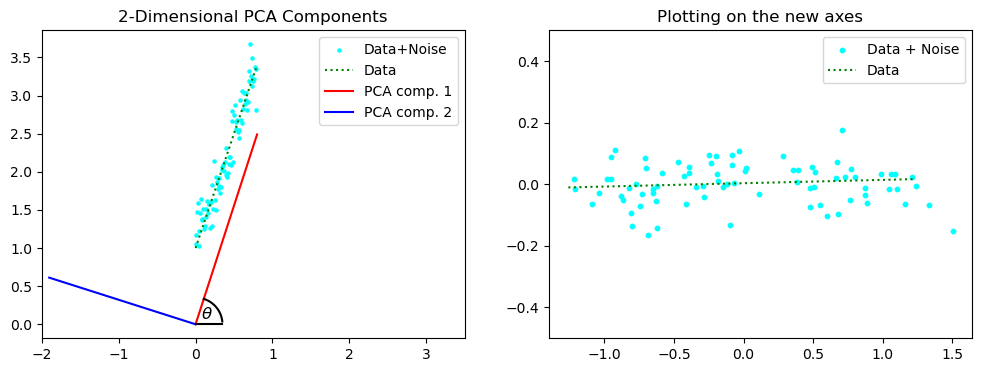

In [445]:
import matplotlib
from matplotlib import pyplot as plt

def get_slope (component):
    """
    Return theta and slope given component which contains cos and sin of theta.
    
    cos theta alone does not determine theta, let alone slope; `np.arcos` works
    by only returning theta values between 0 and $\pi$.  But other theta-values are 
    possible and relevant for us.
    
    Fortunately cos and sin together do determine theta.
    """
    cos_theta, sin_theta = component[0],component[1]
    theta = np.sign(sin_theta) * np.arccos(cos_theta)
    return theta, np.tan(theta)
    
regenerate_noise=True
if regenerate_noise:
    # We regenerate the noise but always start with the same line
    Data, Data2 = line_with_noise (slope=3,intercept=1,bd=bd,std=.2)

# PCA axes with 2 components (N0 nreduction, just new axes)
(Data_reduced2,reducer2) = PCA_reduced(Data2, n_components=2)

#components2 = reducer2.components_.T
#comp_vec1,comp_vec2 =  components2[:,0],components2[:,1]
components2 = reducer2.components_
comp_vec1,comp_vec2 =  components2[0],components2[1]


diag_signs = np.sign(comp_vec1[0]),np.sign(comp_vec2[1])
off_diag_signs = np.sign(comp_vec1[1]),np.sign(comp_vec2[0])
theta,slope = get_slope (comp_vec1)

if diag_signs[0] == diag_signs[1] and off_diag_signs[0] != off_diag_signs[1]:
    print(f"Rotation Slope: {slope}")
elif diag_signs[0] != diag_signs[1] and off_diag_signs[0] == off_diag_signs[1]:
    print(f"Reflection Line Slope: {np.tan(theta/2)} New x-axis slope: {slope}")
else:
    print("Unknown transformation")
    
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 4))
## Data + Noisy Data
ax.scatter(Data2[:, 0], Data2[:, 1], s=5, c="cyan",label="Data+Noise")
ax.plot(Data[:,0],Data[:,1],c="green",linestyle="dotted",label="Data")

## Make the PCA component lines longer for aesthetics (their direction all that matters)
scaler2 = bd/comp_vec1[0]
comp_vec1 = scaler2 * comp_vec1
xhat,yhat = comp_vec1[0],comp_vec1[1]
ax.plot(np.array([0,xhat]),np.array([0,yhat]),c="r",label="PCA comp. 1")

scaler2a_mag = 2   # 2 works! That's why!
if comp_vec2[0] > 0:
    # Keep y vals from being neg, for picture symmetry
    scaler2a = -scaler2a_mag  
else:
    scaler2a = scaler2a_mag
comp_vec2 = scaler2a* comp_vec2
xhat2,yhat2 = comp_vec2[0],comp_vec2[1]
ax.plot(np.array([0,xhat2]),np.array([0,yhat2]),c="b",label="PCA comp. 2")

###Get the parameters of the angle arc
cos_theta = np.abs(np.cos(theta)) # not comp_vec1[0] because that's been scaled
print(theta,cos_theta)
radius,step = .35,.001
r_sq = radius**2
# Draw the arc of the pie wedge containing theta, an arc of a circle y = sq_rt(r^2 - x^2)
semi_circle = lambda x: (r_sq-(x**2))**.5
arc_x=np.arange(radius*cos_theta, radius-step, step)
ax.plot(arc_x, semi_circle(arc_x), c="k")
# Draw  segment of pie wedge coinciding with x-axis
ax.plot(np.array([0,radius]),np.array([0,0]),c="k")
ax.annotate(r"$\theta$",(0,0),textcoords="offset points",xytext=(4,4),fontsize=12)
#ax.set_xlim([0,7])
ax.legend()
ax.set_xlim([-2,3.5])
ax.set_title("2-Dimensional PCA Components")


#####  Second plot
ax2.scatter(Data_reduced2[:,0],Data_reduced2[:,1],s=10,label="Data + Noise",c="cyan")
tData = reducer2.transform(Data)
ax2.plot(tData[:,0],tData[:,1],label="Data",c="g",linestyle="dotted")
ax2.set_ylim(-.5,.5)
ax2.set_title("Plotting on the new axes")
ax2.legend()

In the picture on the left, the red line is always about the same as the red line line in the
previous plot.  However, many axes we ask for, the first component of PCA will always be the
unique line maximizing the amount of explained variance.


#### The latent space

The picture on the right shows what it means to plot our points in the coordinate of system
of the PCA components.  The blue points we're scattering are just the transformed version of the original
noisy points

```python
Data_reduced = reducer.transform(Data2)
```

while the line we're plotting is the transformed version of the original line:

```
tData = reducer.transform(Data)
```

The fact that our transformed line is not parallel to the new x-axis is, again, a reflection
of the fact that PCA can only approximately model the direction of the original line.

In the picture on the right, the points are being represented in a new **space**. 
This is sometimes called the **latent space**.  The new axes are themselves variables
which are linear combination of the old variables, but the new variables are **latent**
or **implicit**.

#### Using the term rotation correctly

This rotation view of PCA is very helpful and a great picture of what PCA does,  but it is only sometimes the case that the latent axes are actually rotations of the original axis.  If you think  about our iris data, the original data has 4 dimensions.  This means our components have this  form:

```python
[a,  b, c, d]
```

And although it is true that 

$$
a^2 + b^2 + c^2 + d^2 = 1,
$$

there are no longer two numbers whose squares add up to one, standing in a sin/cos relation,
so no angle $\theta$ that we can conveniently find.  We normally talk about rotation
in 2 and 3 dimensions.  Although mathematicians do talk about rotation in 4D
Euclidean space, the rotation metaphor ceases to be of much use to the
rest of us humans when the  data is 4D.  You can look  at [the Wikipedia page on 4D rotation](https://en.wikipedia.org/wiki/Rotations_in_4-dimensional_Euclidean_space) if you'd like to seem some 
pictures demonstrating why.

The term rotation of axes, however, does arise meaningfully in statistical analysis of higher dimensional data , especially in factor analysis, which is related to PCA.  In factor analysis the latent axes are called **factors**.  The rotations being talked about there are happening in the latent space.  In that case, it doesn't matter what the dimensionality of the original data
is.  For instance we might rotate the axes in the latent-space picture above
so as to make the axes truly parallel to `Data` (if we had independent evidence of where `Data` was),
or we might want to find axes that increase the coordinate values of the data in
the latent space, so as to improve visualization, heighten contrasts between the axes,
or improve interpretability.  


Finally, this example can be slightly modified to show the limitations of PCA. Same, picture but let's
generate the noisy data from **two** different lines.

In [305]:
bd = .8
Data_L1, Data2_L1 = line_with_noise (slope=3,intercept=4,bd=bd,std=.2)
Data_L2, Data2_L2 = line_with_noise (slope=6,intercept=6,bd=bd,std=.2)

# Combine the two lines in to one data set. 160 rows instead of 80
Data_L1_L2 = np.concatenate([Data_L1,Data_L2],axis=0)
Data2_L1_L2 = np.concatenate([Data2_L1,Data2_L2],axis=0)

(Data_reduced_L1_L2,reducer_L1_L2) = PCA_reduced(Data2_L1_L2, n_components=1)

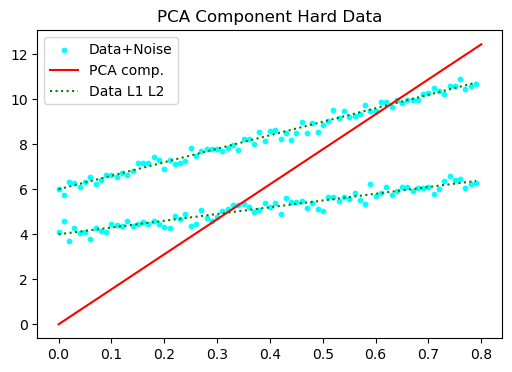

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# scaling
#Data,Data2 = 40*Data, 40*Data2
ax.scatter(Data2_L1_L2[:, 0], Data2_L1_L2[:, 1], s=10, c="cyan",label="Data+Noise")
comp_vec = reducer_L1_L2.components_[0]
# Get the PCA axis and the data xrange to be the same
scaler = bd/comp_vec[0]
comp_vec = scaler * comp_vec

xhat,yhat = comp_vec[0], comp_vec[1]
ax.plot(np.array([0,xhat]),np.array([0,yhat]),c="r",label="PCA comp.")
ax.plot(Data_L1_L2[:80,0],Data_L1_L2[:80,1],c="green",linestyle="dotted",label="Data L1 L2")
ax.plot(Data_L1_L2[80:,0],Data_L1_L2[80:,1],c="green",linestyle="dotted")
ax.set_title("PCA Component Hard Data")
ax.legend()

If there is no single linear trend PCA will still find the direction that maximizes the
explained variance, but that direction won't uncover a useful generalization.  Sometimes
PCA just has nothing useful to tell us.

And in fact the variance accounted for can look quite good with a very bad model:

In [38]:
reducer_L1_L2.explained_variance_ratio_

array([0.99032184])

So **explained variance** is a term to use with caution.  It's mostly used
in discussing models, especially regression and dimensionality reduction
models, and its significance for any real world task is often a head scratcher.

Here are two important requirements for PCA to give good results as a dimensionality reduction technique:

1.  The relationship between the variables is linear or nearly so as in our noise example. This is what's going wrong in the picture above. There's no single linear relationship that capture all the points.  This picture is as simple as it can be to make a point.  It's often the case, especially with higher dimensionality data, that there is a useful linear relationship that at least approximates the data.  That's why PCA and other linear models have proved useful.
2.  To use PCA for dimensionality reduction, the variables can't be completely independent. You need to have correlations between the variables so that reduction can be done with little loss of information. That's eminently the case with our iris data:

In [426]:
iris = sklearn.datasets.load_iris(as_frame=True)
df = iris.data
y = iris.target
# Get correlations
corr_df = df.corr()
corr_df.style.background_gradient(cmap='Blues')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Question 2 (Completely optional):**  We've been measuring information loss (or how good an approximation PCA and SVD
give) by untransforming the data and using Frobenius Norm, so the Eckart-Young theorem should apply.  SVD Reduced should give the best rank 2 
approximation.  Yet here are the results for our two reductions:

In [39]:
#PCA

X = iris.data
reducer = dec.PCA(n_components=2)
reducer_svd = dec.TruncatedSVD(n_components=2)
X_reduced = reducer.fit_transform(X)
X_reduced_svd = reducer_svd.fit_transform(X)
information_lost(X, X_reduced, reducer)

3.899313318962578

In [40]:
information_lost(X, X_reduced_svd, reducer_svd)

3.940889887879374

PCA wins. Less information lost.  How is this possible?  Have we just shaken the foundations of Linear Algebra
by discovering a counterexample: a better approximation than the reduced SVD approximation?
(*Note:  This question is best answered by looking at the definition of `information_lost` and knowing a little Linear Algebra.*)

To measure the information lost we untransform the PCA and SVD reductions
and compare the untransformed data to the original data. The untransformed SVD data has rank 2.
The untransformed PCA data does not.

In [42]:
from numpy.linalg import matrix_rank

print("SVD untransformed: Rank", matrix_rank(reducer_svd.inverse_transform(X_reduced_svd)))

print("PCA untransformed: Rank", matrix_rank(reducer.inverse_transform(X_reduced)))

SVD untransformed: Rank 2
PCA untransformed: Rank 3


So the truncated SVD estimate **is** the best rank 2 approximation, but the PCA
approximation is a rank 3 approximation, so it can be better.
​
The reason this is possible is instructive.
The untransformed SVD representation of the 150 rows of X is just 
150 weighted sums of the same 2 orthogonal
eigenvectors, so it must have rank 2.  The untransformed PCA representation
is computed in two steps:
​
1. Weighted sums of the leading 2 eigenvectors of the covariance matrix, yielding a matrix M which is an 
   approximation of the **centered data**,  which must have rank 2. 
2. We add the means of the 4 iris variables to M,  uncentering M.  The result of this computation does
   not have to have rank 2.
  
